In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
insurance=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\new_insurance_data.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# EDA

In [5]:
print(insurance.isnull().sum())

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64


In [6]:
cols=insurance.columns
for col in cols:
    if insurance[col].dtype=="object":
        insurance[col].fillna(insurance[col].mode()[0],inplace=True)
    else:
        insurance[col].fillna(insurance[col].mean(),inplace=True)

In [7]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [8]:
#check shape before dropping duplicates
insurance.shape

(1338, 13)

In [9]:
#drop duplicates if exist
insurance.drop_duplicates(inplace=True)

In [10]:
#check shape after dropping duplicates [ no duplicated in dataset]
insurance.shape

(1338, 13)

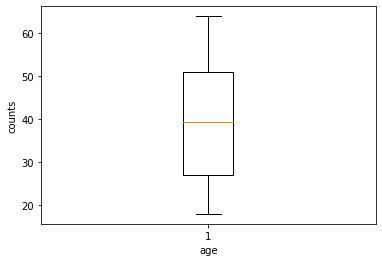

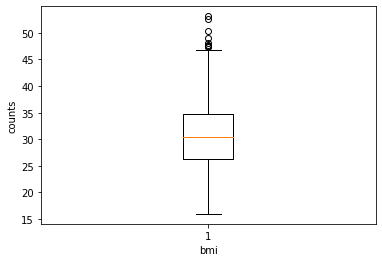

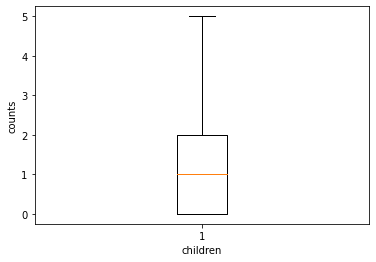

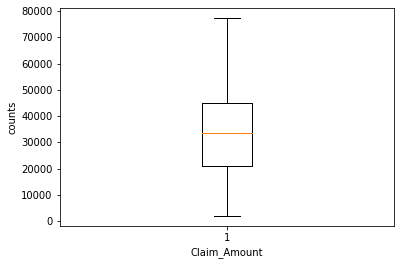

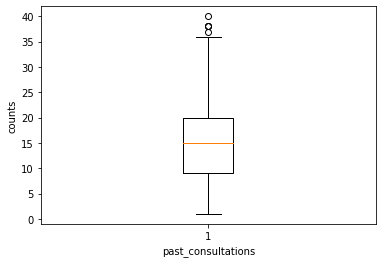

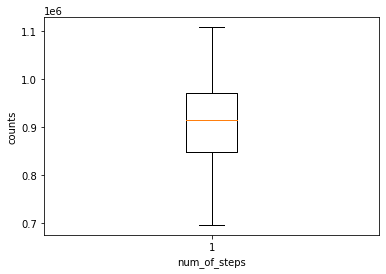

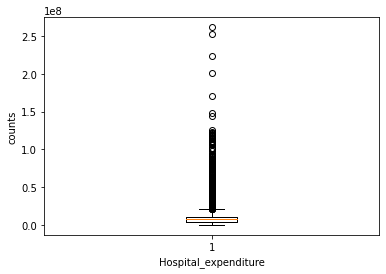

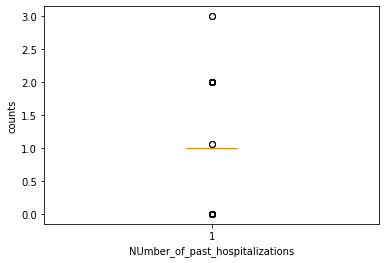

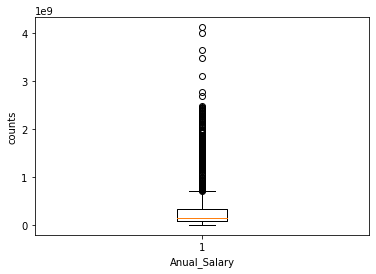

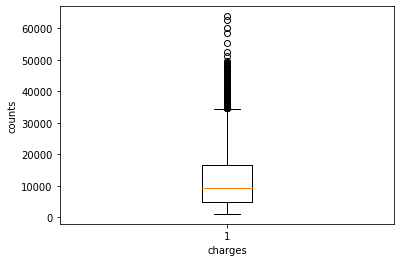

In [11]:
#Visualize Dataset to under it more efficiently
cols=insurance.columns
for col in cols:
    if insurance[col].dtype=="object":
        pass
    else:
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.show()

# Outlier Detection And Removal
    as we can see in visualization there are outliers present [bmi,post_consulatations,hospital_enpenditure,annual salary]

In [12]:
outlier_cols=["bmi","past_consultations","Hospital_expenditure","Anual_Salary"]
for col in outlier_cols:
    Q1=insurance[col].quantile(0.25)
    Q3=insurance[col].quantile(0.75)
    IQR=Q3-Q1
    insurance=insurance[(insurance[col]>=Q1-1.5*IQR) & (insurance[col]<=Q3+1.5*IQR)]
    print(col)

bmi
past_consultations
Hospital_expenditure
Anual_Salary


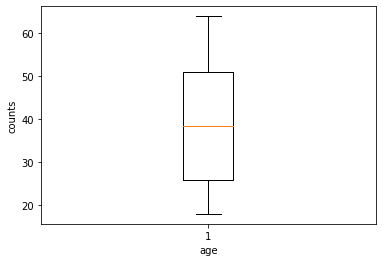

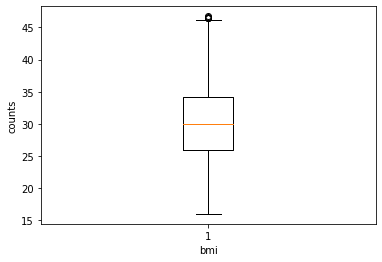

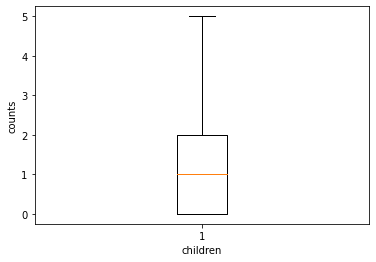

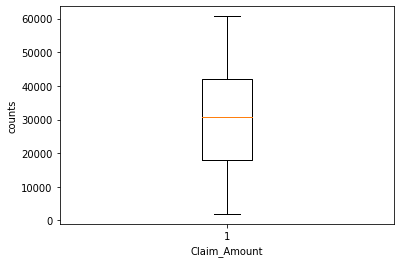

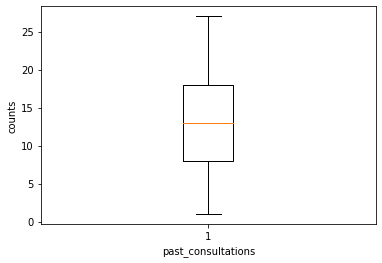

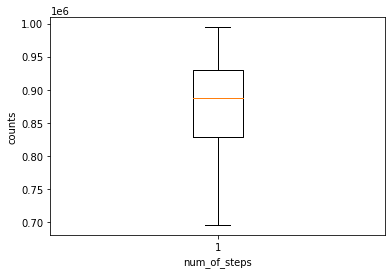

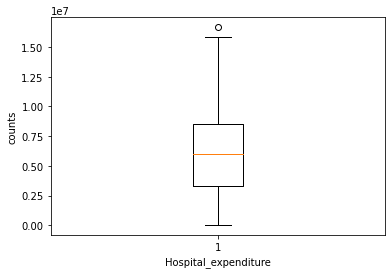

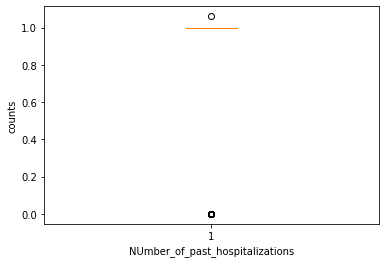

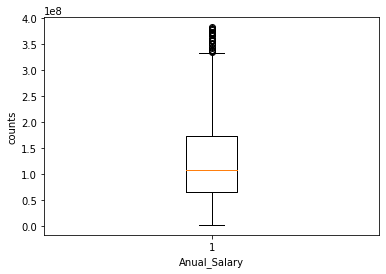

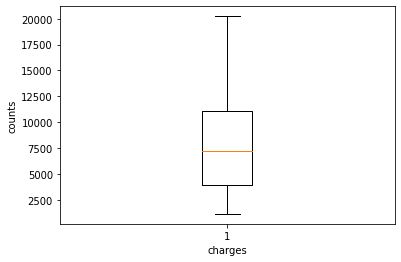

In [13]:
#Visualize after outlier removal to cross check
cols=insurance.columns
for col in cols:
    if insurance[col].dtype=="object":
        pass
    else:
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.show()

In [14]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


# Feature Selection
    1. Encoding
    2. select feature using vif
        vif requires only numberic features.

In [15]:
#Encoding Requires independent object format data
cat_features=[]
for col in insurance.columns:
    if(insurance[col].dtype=="object") & (col!="charges"):
        cat_features.append(col)
cat_features

['sex', 'smoker', 'region']

In [16]:
#import Label Encoder from preprocessing package
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in cat_features:
    insurance[col]=label.fit_transform(insurance[col])

In [17]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


In [18]:
insurance.sex.value_counts()

0    531
1    499
Name: sex, dtype: int64

In [19]:
insurance.region.value_counts()

3    265
2    259
1    257
0    249
Name: region, dtype: int64

In [20]:
insurance.smoker.value_counts()

0    985
1     45
Name: smoker, dtype: int64

In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   int32  
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   int32  
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   int32  
 12  charges             

In [22]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [23]:
#VIF (Required numberic columns so we have converted catogorical features into numeric)
numeric_cols=[]
for col in insurance.columns:
    if((insurance[col].dtype!="object") & (col!="charges")):
        numeric_cols.append(col)
X=insurance[numeric_cols]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns)) ]
vif_data

,features,VIF
0,age,25.802554
1,sex,1.969526
2,bmi,28.861355
3,children,2.100201
4,smoker,2.580684
5,Claim_Amount,5.725838
6,past_consultations,6.266415
7,num_of_steps,67.817494
8,Hospital_expenditure,5.255777
9,NUmber_of_past_hospitalizations,12.683402


In [24]:
insurance.drop("age",axis=1,inplace=True)

In [25]:
numeric_cols=[]
for col in insurance.columns:
    if((insurance[col].dtype!="object") & (col!="charges")):
        numeric_cols.append(col)
X=insurance[numeric_cols]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns)) ]
vif_data

,features,VIF
0,sex,1.961920
1,bmi,28.567199
2,children,1.994863
3,smoker,1.548634
4,Claim_Amount,5.716429
5,past_consultations,6.266410
6,num_of_steps,60.086031
7,Hospital_expenditure,5.255777
8,NUmber_of_past_hospitalizations,10.958860
9,Anual_Salary,6.215648


In [26]:
insurance.drop("num_of_steps",axis=1,inplace=True)

In [27]:
numeric_cols=[]
for col in insurance.columns:
    if((insurance[col].dtype!="object") & (col!="charges")):
        numeric_cols.append(col)
X=insurance[numeric_cols]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns)) ]
vif_data

,features,VIF
0,sex,1.904850
1,bmi,13.594302
2,children,1.993226
3,smoker,1.544787
4,Claim_Amount,5.286851
5,past_consultations,5.869192
6,Hospital_expenditure,5.041310
7,NUmber_of_past_hospitalizations,8.409322
8,Anual_Salary,5.982111
9,region,2.949788


In [28]:
insurance.drop("bmi",axis=1,inplace=True)

In [29]:
numeric_cols=[]
for col in insurance.columns:
    if((insurance[col].dtype!="object") & (col!="charges")):
        numeric_cols.append(col)
X=insurance[numeric_cols]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns)) ]
vif_data

,features,VIF
0,sex,1.809600
1,children,1.992866
2,smoker,1.416918
3,Claim_Amount,4.731765
4,past_consultations,5.364196
5,Hospital_expenditure,4.701554
6,NUmber_of_past_hospitalizations,7.589932
7,Anual_Salary,5.940588
8,region,2.591948


In [30]:
insurance.drop("NUmber_of_past_hospitalizations",axis=1,inplace=True)

In [31]:
numeric_cols=[]
for col in insurance.columns:
    if((insurance[col].dtype!="object") & (col!="charges")):
        numeric_cols.append(col)
X=insurance[numeric_cols]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns)) ]
vif_data

,features,VIF
0,sex,1.808334
1,children,1.758620
2,smoker,1.365174
3,Claim_Amount,4.399574
4,past_consultations,5.086668
5,Hospital_expenditure,4.551832
6,Anual_Salary,5.213169
7,region,2.578534


# Data is ready to Train the Model

In [35]:
#spliting independent and dependent variabale from dataset
x=insurance[vif_data.features]
y=insurance["charges"]
x.shape,y.shape

((1030, 8), (1030,))

In [37]:
#splited x and y data into 80/20 ratio
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

# Model Building

In [38]:
#import model
from sklearn.linear_model import LinearRegression
#create object of LinearRegression Model
lr=LinearRegression()
#Train the model
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
#Test Model
y_pred=lr.predict(x_test)
#Train score
lr.score(x_train,y_train)

In [40]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.841088772426384